## Author - SANJOLI SAHNI

# Exploratory Data Analysis - Retail

# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
df = pd.read_csv(r'C:\Users\rupal\Downloads\\SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
df.shape

(9994, 13)

In [6]:
df1=df.drop('Postal Code',axis=1)

In [7]:
df1.shape

(9994, 12)

### Checking Null Values

In [8]:
df1.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Exploring About Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [10]:
df.duplicated().sum()

17

### Dropping the duplicates values

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 779.5+ KB


### Here postal code which is not a useful column, hence we are dropping it.

In [13]:
df.drop(['Postal Code'],axis=1, inplace=True)

### The Datset Consits of 13 features and each feature consists of 9994 samples.

#### Check for the null values

In [14]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### As we see there is no null values present in dataset

#### finding the correlation between the features


In [15]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


## Here the correlation is done only 5 columns because the remaining columns contains non numerical values.

## Visualizing the dataset

### Visualizing the correlation between the features

<AxesSubplot:>

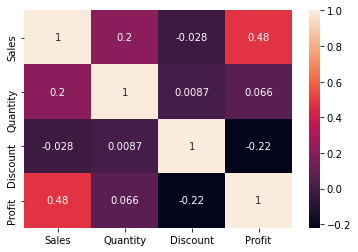

In [16]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

### Here 1 represents strong positive correlation and -0.2 for negative correlation

In [17]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

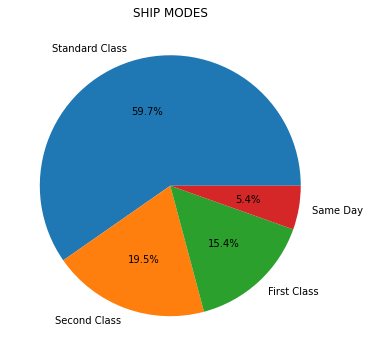

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

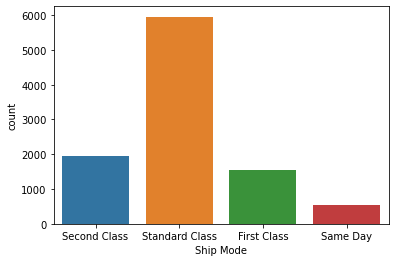

In [18]:
plt.figure(figsize=(6,6))
plt.title('SHIP MODES')
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index, autopct= '%1.1f%%')
plt.show()
sns.countplot(x=df['Ship Mode'])

## In ship mode, most of them are preferring the standard class

In [19]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

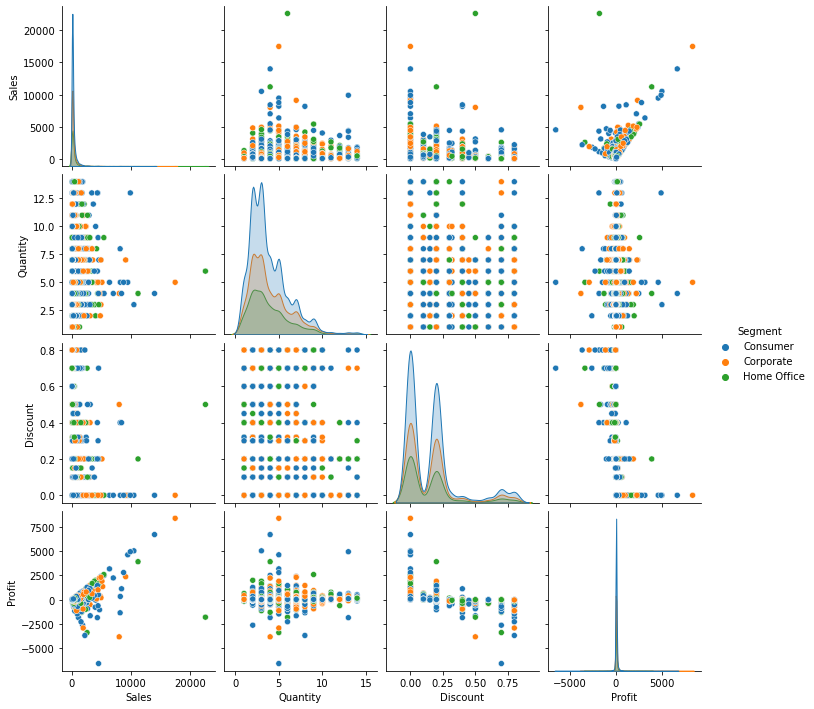

In [20]:
sns.pairplot(df,hue='Segment')

### Here we can see in segment, profit and sales has some positive correlation

In [21]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

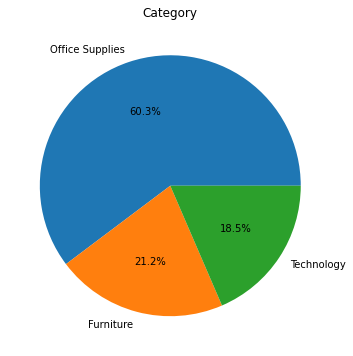

<AxesSubplot:xlabel='Category', ylabel='count'>

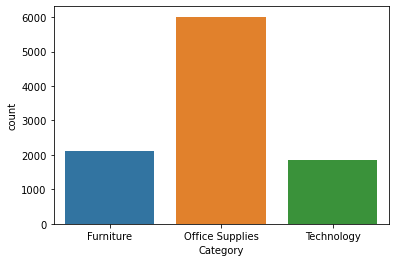

In [22]:
plt.figure(figsize=(6,6))
plt.title('Category')
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.show()
sns.countplot(x='Category',data=df)

### Here office suppliers category has more then furniture and technology

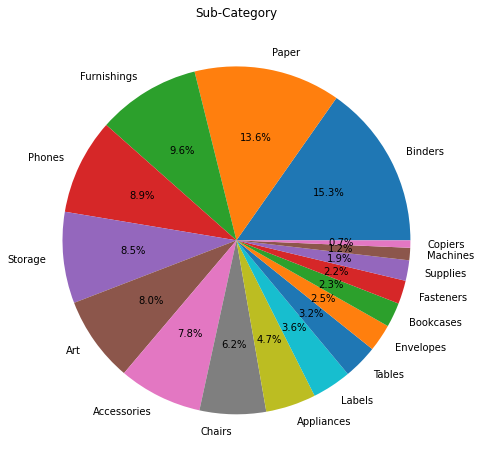

In [23]:
plt.figure(figsize=(8,8))
plt.title('Sub-Category')
plt.pie(df['Sub-Category'].value_counts(),labels=df['Sub-Category'].value_counts().index, autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='State'>

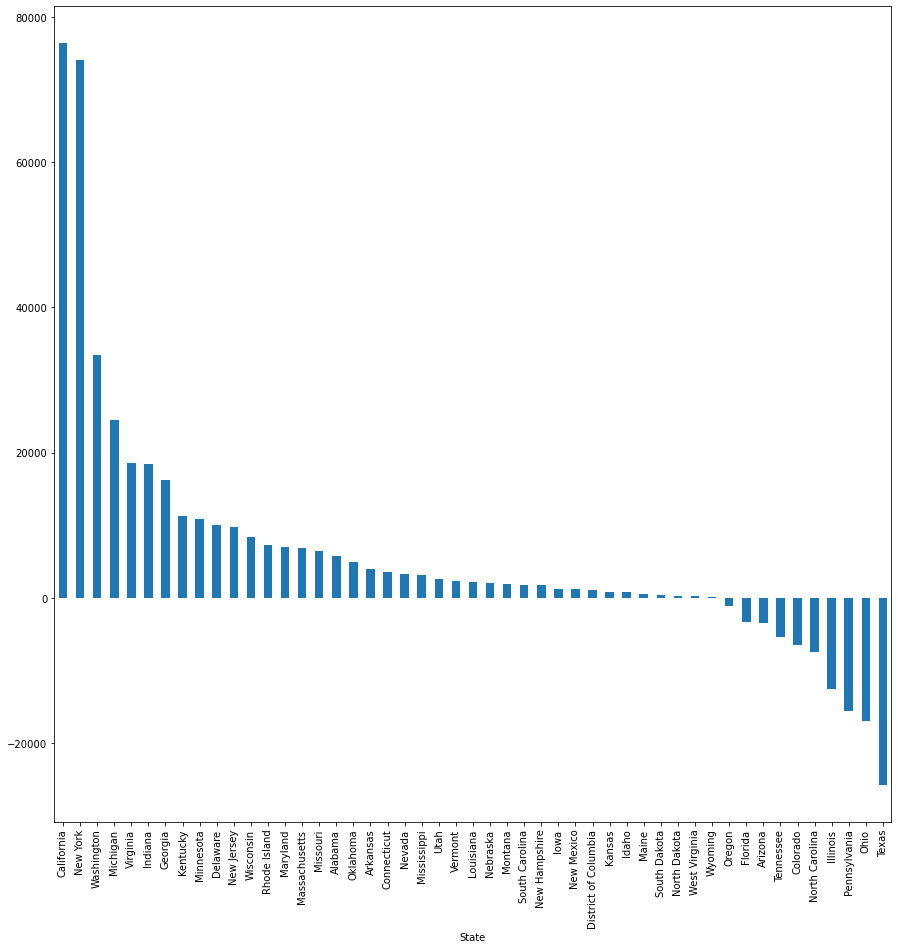

In [24]:
plt.figure(figsize=(15,15))
stpr=df.groupby(['State'])['Profit'].sum().nlargest(50)
stpr.plot.bar()

### Graph Display that California and New York have the highest profits while Texas and Ohio have the least profits

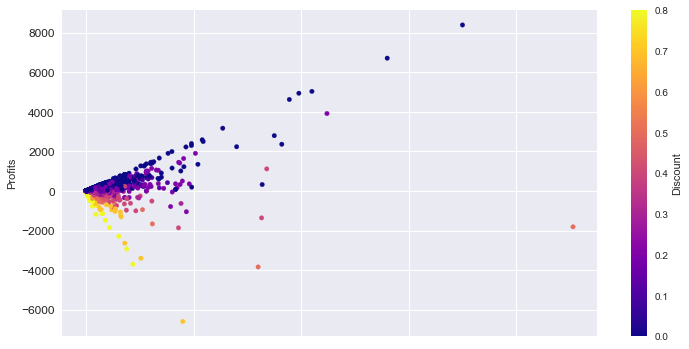

In [25]:
plt.style.use('seaborn')
df.plot(kind="scatter",figsize=(12,6),x="Sales",y="Profit",c="Discount",s=20,fontsize=12,colormap='plasma')
plt.ylabel('Profits')
plt.xlabel('Sales')
plt.show()

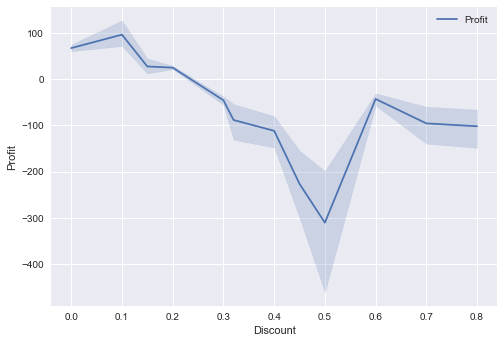

In [26]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

## We can clearly observe that the discount has a negative relation with profit i.e. as the profit is increasing the Profit generated is decreased

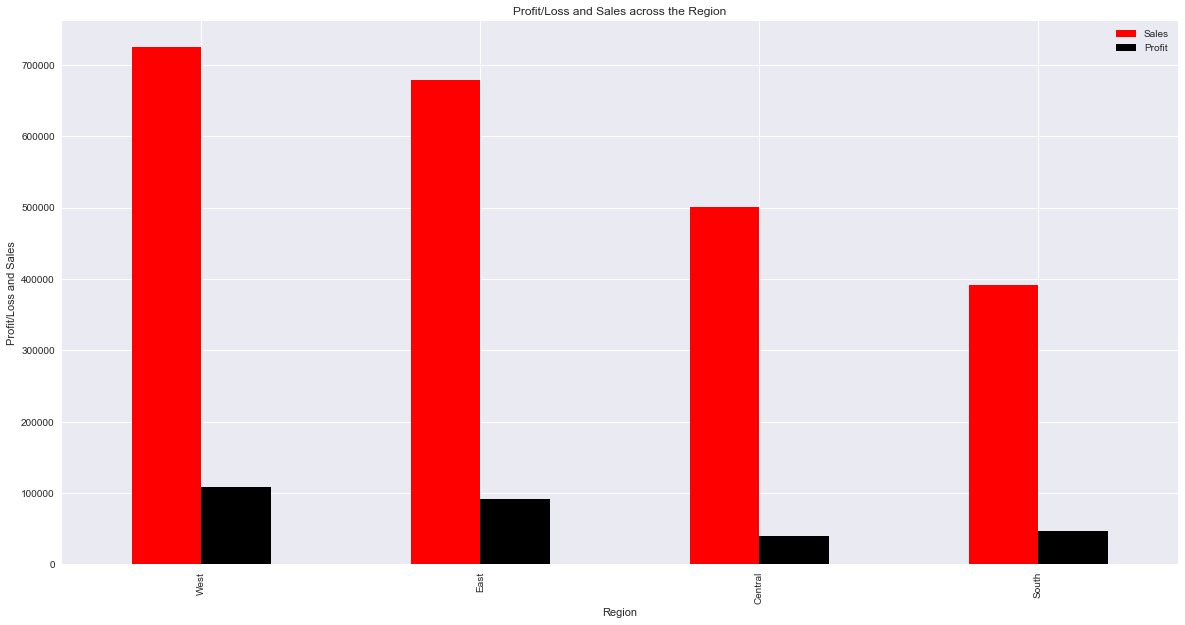

In [27]:
pls=df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the Region')
plt.xlabel('Region')
plt.ylabel('Profit/Loss and Sales')
plt.show()

### More the Discount More the Sales but lesser the Profits

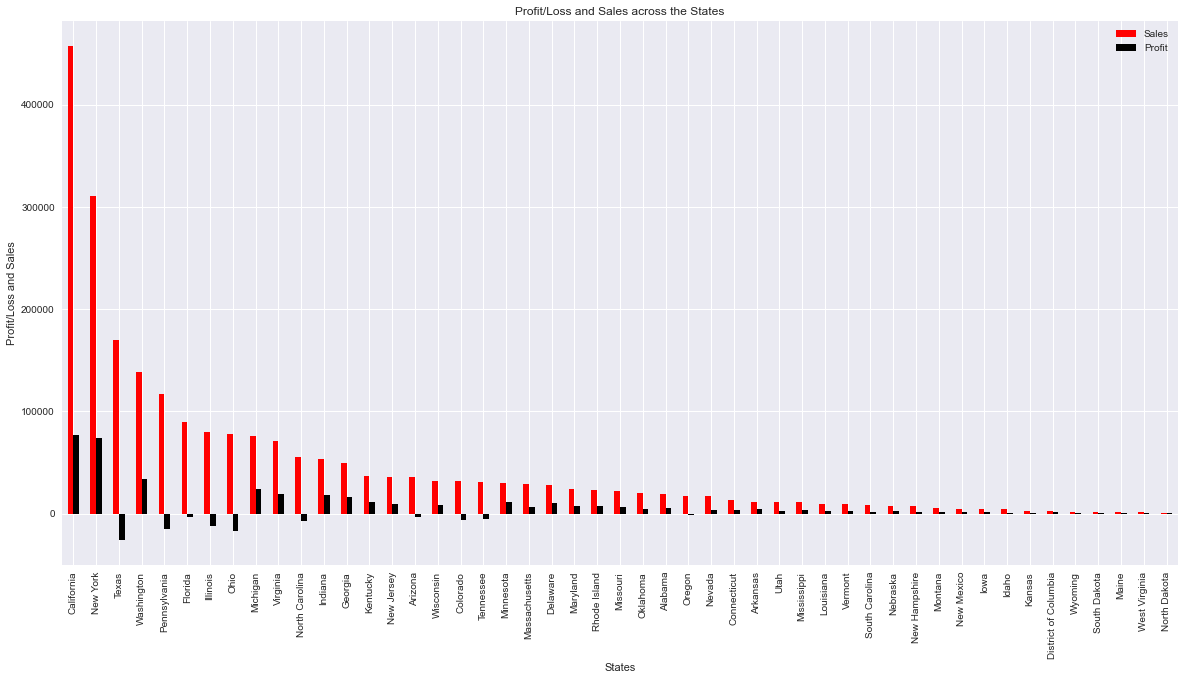

In [29]:
pls=df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the States')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.show()